**Created by Berkay Alan**

**Classification with Support Vector Machines 📈💯**

**10 August 2021**

**For more Tutorial:** https://github.com/berkayalan/Data-Science-Tutorials

## Resources

- **The Elements of  Statistical Learning** - Trevor Hastie,  Robert Tibshirani, Jerome Friedman -  Data Mining, Inference, and Prediction (Springer Series in Statistics) 

- [**What is a Confusion Matrix in Machine Learning?**](https://machinelearningmastery.com/confusion-matrix-machine-learning/)

- [**Support Vector Machines for Machine Learning**](https://machinelearningmastery.com/support-vector-machines-for-machine-learning/)

- [**Support Vector Machines with Scikit-learn**](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

- [**Support Vector Machines by Statquest**](https://www.youtube.com/watch?v=efR1C6CvhmE&ab_channel=StatQuestwithJoshStarmer)

- [**Support Vector Machines with Scikit-learn**](https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python)

- [**SVM by Sklearn**](https://scikit-learn.org/stable/modules/svm.html)

- [**Kernel Functions-Introduction to SVM Kernel & Examples**](https://data-flair.training/blogs/svm-kernel-functions/)

## Importing Libraries

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
pip install skompiler

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict,ShuffleSplit,GridSearchCV
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,BaseEnsemble,GradientBoostingClassifier
from sklearn.svm import SVC,LinearSVC
import time
from matplotlib.colors import ListedColormap
from xgboost import XGBRegressor
from skompiler import skompile
from lightgbm import LGBMRegressor

In order to see all rows and columns, we will increase max display numbers of dataframe.

In [ ]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Support Vector Machines - Classifier(SVM) - Linear Kernel

### Theory

Support Vector Machine gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data. The objective function of SVM is to minimize the coefficients — more specifically, the l2-norm of the coefficient vector — not the squared error. The error term is instead handled in the constraints, where we set the absolute error less than or equal to a specified margin, called the maximum error, **ϵ (epsilon)**. We can tune epsilon to gain the desired accuracy of our model.

**Support Vectors**: Support vectors are the data points, which are closest to the hyperplane. These points will define the separating line better by calculating margins. These points are more relevant to the construction of the classifier.

**Hyperplane**: A hyperplane is a decision plane which separates between a set of objects having different class memberships.

**Margin**: A margin is a gap between the two lines on the closest class points. This is calculated as the perpendicular distance from the line to support vectors or closest points. If the margin is larger in between the classes, then it is considered a good margin, a smaller margin is a bad margin.

Illustrative example:

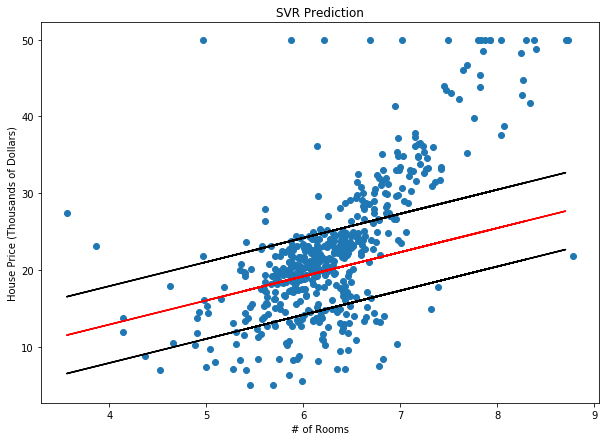

Photo is cited by:https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

As we can see, we have data points that are outside the epsilon in sensitive tube. We care about the error for them and they will be measured as distance between the point and the tube. As such, we need to account for the possibility of errors that are larger than ϵ. We can do this with slack variables.

The concept of **slack variables** is simple: for any value that falls outside of ϵ, we can denote its deviation from the margin as ξ.

That's the formula to minimise:

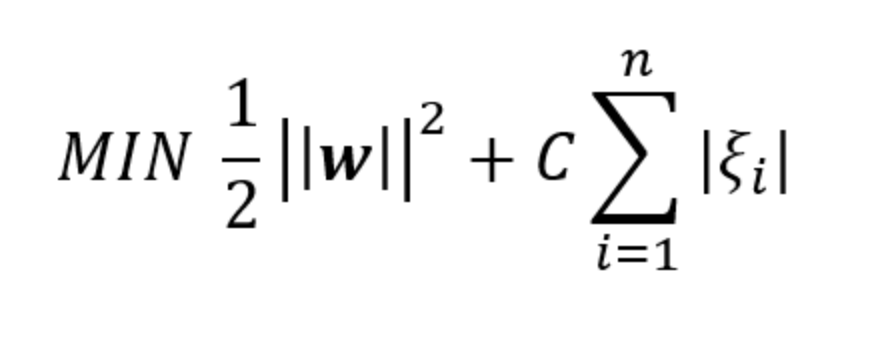

Photo is cited by: https://towardsdatascience.com/an-introduction-to-support-vector-regression-svr-a3ebc1672c2

We now have an additional **C** hyperparameter that we can tune. As C increases, our tolerance for points outside of ϵ also increases. As C approaches 0, the tolerance approaches 0 and the equation collapses into the simplified one.

SVM uses Maximum Margin Classifiers to find maximum margin. But Maximum Margin Classifiers are super sensitive to outliers in the training data. To make a treshold that less sensitive to outliers, we allow misclassification. This makes higher bias and low variance. When we allow misclassification to the distance between supporter observation and threshold, it is called **Soft Margin**. In order to understand best soft margin, we use cross validation.

Some problems can’t be solved using linear hyperplane. In such situation, SVM uses a kernel trick to transform the input space to a higher dimensional space.

**SVM Kernels**

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. Kernel Functions only calculate the relationships between every pair of points as if they are in the higher dimensions, the do not actually do the transformation.  This is called Kernel Trick. In other words, we can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps us to build a more accurate classifier.

**Some Kernels**

- **Linear Kernel**: A linear kernel can be used as normal dot product any two given observations. The product between two vectors is the sum of the multiplication of each pair of input values.

        K(x, xi) = sum(x * xi)

- **Polynomial Kernel**: A polynomial kernel is a more generalized form of the linear kernel. The polynomial kernel can distinguish curved or nonlinear input space.

        K(x,xi) = 1 + sum(x * xi)^d (Where d is the degree of the polynomial)

- **Radial Basis(Gaussion) Function Kernel**: The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in **infinite dimensional space**.

        K(x,xi) = exp(-gamma * sum((x – xi^2))
        
Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm.

I highly suggest you to read [this article](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200) for this part.

### Model

For a real world example, we will work with **Pima Indians Diabetes Database** data set by UCI Machine Learning.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We will try to predict whether the patient has diabetes or not.

In [ ]:
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [ ]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

In [ ]:
support_vector_classifier = SVC(kernel="linear").fit(X_train,y_train)

We also could use *svm.LinearSVC()* function directly.

In [ ]:
support_vector_classifier

In [ ]:
# Default C
support_vector_classifier.C

### Prediction

In [ ]:
support_vector_classifier

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [ ]:
y_pred = support_vector_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

- **true positive**: for correctly predicted event values.
- **false positive**: for incorrectly predicted event values.
- **true negative**: for correctly predicted no-event values.
- **false negative**: for incorrectly predicted no-event values.

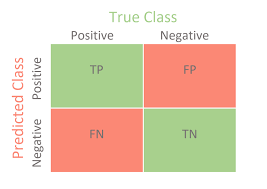

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fconfusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826&psig=AOvVaw29atdmY9s4wmI-rc0qQZZb&ust=1628435461495000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKj1g_2Yn_ICFQAAAAAdAAAAABAD).

In [ ]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

### Model Tuning & Validation

In [ ]:
support_vector_classifier

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [ ]:
accuracies= cross_val_score(estimator=support_vector_classifier,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

In [ ]:
support_vector_classifier.predict(X_test)[:10]

Now we will tune our model with GridSearch.

In [ ]:
svm_params ={"C":np.arange(1,20)}

In [ ]:
svm = SVC(kernel="linear")
svm_cv = GridSearchCV(svm,svm_params,cv=8)

In [ ]:
start_time = time.time()

svm_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Support Vector Regression cross validation: "
      f"{elapsed_time:.3f} seconds")

In [ ]:
#best score
svm_cv.best_score_

In [ ]:
#best parameters
svm_cv.best_params_

In [ ]:
svm_tuned = SVC(kernel="linear",C=2).fit(X_train,y_train)

In [ ]:
svm_tuned

In [ ]:
y_pred = svm_tuned.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

- **true positive**: for correctly predicted event values.
- **false positive**: for incorrectly predicted event values.
- **true negative**: for correctly predicted no-event values.
- **false negative**: for incorrectly predicted no-event values.

In [ ]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

## Support Vector Machines - Classifier(SVM) - Radial Basis Kernel(RBF)

### Theory

The SVM algorithm is implemented in practice using a kernel. A kernel transforms an input data space into the required form. Kernel Functions only calculate the relationships between every pair of points as if they are in the higher dimensions, the do not actually do the transformation.  This is called Kernel Trick. In other words, we can say that it converts nonseparable problem to separable problems by adding more dimension to it. It is most useful in non-linear separation problem. Kernel trick helps us to build a more accurate classifier.

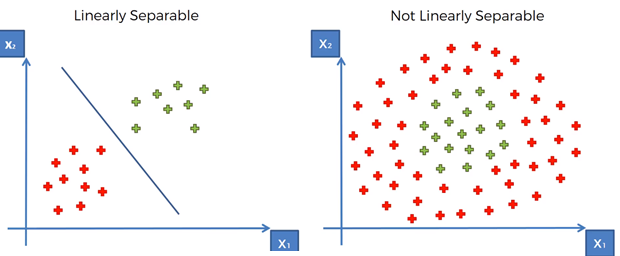

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Fmedium.com%2Fpursuitnotes%2Fday-12-kernel-svm-non-linear-svm-5fdefe77836c&psig=AOvVaw04okfh2OVimfvUsX8lEKRm&ust=1628623796797000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCNDUns3WpPICFQAAAAAdAAAAABAD).

But mapping to a higher dimensional space can be highly compute-intensive. Therefore this approach is not the best. We use **kernel trick** because of that. 

**Radial Basis(Gaussion) Function Kernel**: The Radial basis function kernel is a popular kernel function commonly used in support vector machine classification. RBF can map an input space in **infinite dimensional space**.

        K(x,xi) = exp(-gamma * sum((x – xi^2))
        
Here gamma is a parameter, which ranges from 0 to 1. A higher value of gamma will perfectly fit the training dataset, which causes over-fitting. Gamma=0.1 is considered to be a good default value. The value of gamma needs to be manually specified in the learning algorithm. It is specified with cross validation.

When there is a new observation to classify, radial kernel behaves like a *Weighted Nearest Neighbour*. Because the closest observation(nearest neihgbour) have a lot of influence on how we classify the new observation. 

I highly suggest you to read [this article](https://towardsdatascience.com/svm-and-kernel-svm-fed02bef1200) for this part.

### Model

For a real world example, we will work with **Pima Indians Diabetes Database** data set by UCI Machine Learning.

It can be downloaded [here](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

We will try to predict whether the patient has diabetes or not.

In [ ]:
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")
df.head()

In [ ]:
df.shape

In [ ]:
df.describe()

In [ ]:
X = df.drop("Outcome",axis=1)
y= df["Outcome"] #We will predict Outcome(diabetes) 

Now we're going to split our dataset to train and test set. We will choose almost 20% of dataset as test size.

In [ ]:
X_train = X.iloc[:600]
X_test = X.iloc[600:]
y_train = y[:600]
y_test = y[600:]

print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

We will use **rbf kernel** here.

In [ ]:
support_vector_classifier = SVC(kernel="rbf").fit(X_train,y_train)

In [ ]:
#get support vectors
support_vector_classifier.support_vectors_

In [ ]:
#get supports
support_vector_classifier.support_

In [ ]:
# get number of support vectors for each class
support_vector_classifier.n_support_

In [ ]:
#default gamma
support_vector_classifier.gamma

### Prediction

In [ ]:
support_vector_classifier

Because we are doing a classification case, we will create a **confusion matrix** in order to evaluate out model.

In [ ]:
y_pred = support_vector_classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

- **true positive**: for correctly predicted event values.
- **false positive**: for incorrectly predicted event values.
- **true negative**: for correctly predicted no-event values.
- **false negative**: for incorrectly predicted no-event values.

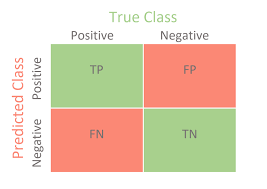

Photo is cited by [here](https://www.google.com/url?sa=i&url=https%3A%2F%2Ftowardsdatascience.com%2Fconfusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826&psig=AOvVaw29atdmY9s4wmI-rc0qQZZb&ust=1628435461495000&source=images&cd=vfe&ved=0CAsQjRxqFwoTCKj1g_2Yn_ICFQAAAAAdAAAAABAD).

In [ ]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

### Model Tuning & Validation

In [ ]:
support_vector_classifier

Now we will try to tune our model by using **K-Fold Cross Validation**.

In [ ]:
accuracies= cross_val_score(estimator=support_vector_classifier,
                            X=X_train,y=y_train,
                            cv=10)
print("Average Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standart Deviation of Accuracies: {:.2f} %".format(accuracies.std()*100))

In [ ]:
support_vector_classifier.predict(X_test)[:10]

Now we will tune our model with GridSearch. We will tune *gamma* and *C* parameters.

In [ ]:
svm_params ={"C":[0.0001,0.001,0.01,0.1,0.5,1,3,5,7,10,40,80,100],
             "gamma":[0.0001,0.001,0.01,0.1,0.5,1,5,10,30,50,100]}

In [ ]:
svm = SVC(kernel="rbf")
svm_cv = GridSearchCV(svm,svm_params,cv=8,n_jobs=-1,verbose=2)

In [ ]:
start_time = time.time()

svm_cv.fit(X_train,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for Support Vector Regression with RBF kernel cross validation: "
      f"{elapsed_time:.3f} seconds")

In [ ]:
#best score
svm_cv.best_score_

In [ ]:
#best parameters
svm_cv.best_params_

In [ ]:
svm_tuned = SVC(kernel="rbf",C=10,gamma=0.0001).fit(X_train,y_train)

In [ ]:
svm_tuned

In [ ]:
y_pred = svm_tuned.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
cm

- **true positive**: for correctly predicted event values.
- **false positive**: for incorrectly predicted event values.
- **true negative**: for correctly predicted no-event values.
- **false negative**: for incorrectly predicted no-event values.

In [ ]:
print("Our Accuracy is: ", (cm[0][0]+cm[1][1])/(cm[0][0]+cm[1][1]+cm[0][1]+cm[1][0]))

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))